In [2]:
import pydot
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import theano
import numpy as np
%matplotlib inline

Using Theano backend.


In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

In [7]:
X_train[0]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
X_train /= 255
X_test /= 255

In [12]:
Y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [14]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [15]:
Y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

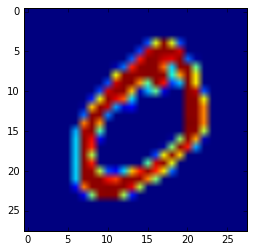

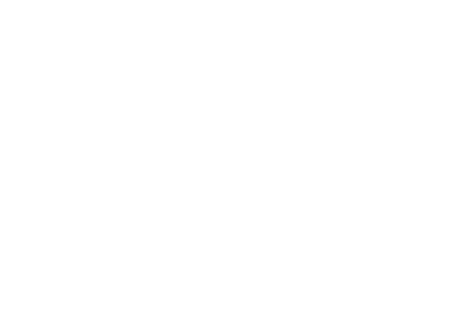

In [28]:
###########visualize##############
plt.imshow(X_train[1].squeeze())
plt.show()
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
#       print innerShapeNo
fig.savefig("testXXXX.png")

In [69]:
batch_size = 128
nb_classes = 10
nb_epoch = 1
# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
kernel_size = (3, 3)

In [70]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))

In [71]:
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [72]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [73]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 100s - loss: 0.3773 - acc: 0.8846 - val_loss: 0.0889 - val_acc: 0.9723


In [74]:
for layerNo in range(0,len(model.layers)):
    print layerNo,model.layers[layerNo]

0 <keras.layers.convolutional.Convolution2D object at 0x7fbd39692e10>
1 <keras.layers.core.Activation object at 0x7fbd3a6cf0d0>
2 <keras.layers.convolutional.Convolution2D object at 0x7fbd3a6cf110>
3 <keras.layers.core.Activation object at 0x7fbd3a6cfb10>
4 <keras.layers.pooling.MaxPooling2D object at 0x7fbd3a700c90>
5 <keras.layers.core.Dropout object at 0x7fbd3a6f5750>
6 <keras.layers.core.Flatten object at 0x7fbd3a6f5910>
7 <keras.layers.core.Dense object at 0x7fbd3a700d10>
8 <keras.layers.core.Activation object at 0x7fbd3a662650>
9 <keras.layers.core.Dropout object at 0x7fbd3a662d50>
10 <keras.layers.core.Dense object at 0x7fbd3a662490>
11 <keras.layers.core.Activation object at 0x7fbd3a662d10>


In [135]:
big_array = []
# for layerNo in range(0,len(model.layers)):
layer = model.layers[2]
g=layer.get_config()
h=layer.get_weights()
h[0].shape
html =  open('html.html','w')
html.writelines("<table>")
count=0
for outShapeNo in h[0]:
    html.writelines("<tr>")
    for innerShapeNo in outShapeNo:
        fig = plt.figure(frameon=False)
        fig.set_size_inches(3,3)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        html.writelines("<td>")
#         print innerShapeNo
        plt.axis('off')
        ax.imshow(innerShapeNo.squeeze(),interpolation='nearest', aspect='normal') #,interpolation='nearest'
        fig.savefig(str(count)+".png")
        html.writelines("<img src='"+str(count)+".png"+"'")
        html.writelines("</td>")
        count =  count+1
        plt.close()
    html.writelines("</tr>")
html.writelines("</table>")

In [136]:
big_array = []
# for layerNo in range(0,len(model.layers)):
layer = model.layers[0]
g=layer.get_config()
h=layer.get_weights()
h[0].shape
html =  open('html2.html','w')
html.writelines("<table>")
count=0
for outShapeNo in h[0]:
    html.writelines("<tr>")
    for innerShapeNo in outShapeNo:
        fig = plt.figure(frameon=False)
        fig.set_size_inches(3,3)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        html.writelines("<td>")
#         print innerShapeNo
        plt.axis('off')
        ax.imshow(innerShapeNo.squeeze(),interpolation='nearest', aspect='normal') #,interpolation='nearest'
        fig.savefig(str(count)+".png")
        html.writelines("<img src='"+str(count)+".png"+"'")
        html.writelines("</td>")
        count =  count+1
        plt.close()
    html.writelines("</tr>")
html.writelines("</table>")

In [ ]:
big_array = []
# for layerNo in range(0,len(model.layers)):
layer = model.layers[0]
g=layer.get_config()
h=layer.get_weights()
h[0].shape
html =  open('html2.html','w')
html.writelines("<table>")
count=0
for outShapeNo in h[0]:
    html.writelines("<tr>")
    for innerShapeNo in outShapeNo:
        fig = plt.figure(frameon=False)
        fig.set_size_inches(3,3)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        html.writelines("<td>")
#         print innerShapeNo
        plt.axis('off')
        np.add()
        ax.imshow(innerShapeNo.squeeze(),interpolation='nearest', aspect='normal') #,interpolation='nearest'
        fig.savefig(str(count)+".png")
        html.writelines("<img src='"+str(count)+".png"+"'")
        html.writelines("</td>")
        count =  count+1
        plt.close()
    html.writelines("</tr>")
html.writelines("</table>")